### Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder

In [2]:
df=pd.read_csv('Company_Data.csv')

In [3]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.Sales.mean()

7.496325000000001

In [5]:
df.Sales.median()

7.49

In [6]:
df['sales']="small"
df.loc[df["Sales"]>7.49,"sales"]="large"
df.drop(["Sales"],axis=1,inplace=True)

In [7]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,large
1,111,48,16,260,83,Good,65,10,Yes,Yes,large
2,113,35,10,269,80,Medium,59,12,Yes,Yes,large
3,117,100,4,466,97,Medium,55,14,Yes,Yes,small
4,141,64,3,340,128,Bad,38,13,Yes,No,small
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,large
396,139,23,3,37,120,Medium,55,11,No,Yes,small
397,162,26,12,368,159,Medium,40,18,Yes,Yes,small
398,100,79,7,284,95,Bad,50,12,Yes,Yes,small


In [8]:
target=df[['sales']]

In [9]:
features=df.drop(['sales'],axis=1)

In [10]:
lab_enc=LabelEncoder()

In [11]:
target['sales']=lab_enc.fit_transform(target['sales'])

C:\Users\hp\AppData\Local\Temp\ipykernel_792\1465760694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['sales']=lab_enc.fit_transform(target['sales'])


In [12]:
target

,sales
0,0
1,0
2,0
3,1
4,1
...,...
395,0
396,1
397,1
398,1


In [13]:
features['ShelveLoc']=lab_enc.fit_transform(features['ShelveLoc'])

In [14]:
features['Urban']=lab_enc.fit_transform(features['Urban'])

In [15]:
features['US']=lab_enc.fit_transform(features['US'])

In [16]:
features

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [17]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=80)

In [18]:
decc_tree=DecisionTreeClassifier(criterion='gini',  splitter='random',max_depth=4)

In [19]:
decc_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [20]:
y_pred=decc_tree.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.76

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        52
           1       0.71      0.85      0.77        48

    accuracy                           0.76       100
   macro avg       0.77      0.76      0.76       100
weighted avg       0.77      0.76      0.76       100



In [23]:
confusion_matrix(y_test,y_pred)

array([[35, 17],
       [ 7, 41]], dtype=int64)

In [24]:
from sklearn.tree import plot_tree

[Text(0.49107142857142855, 0.9, 'x[5] <= 0.767\ngini = 0.5\nsamples = 300\nvalue = [147, 153]'),
 Text(0.26785714285714285, 0.7, 'x[1] <= 94.46\ngini = 0.368\nsamples = 74\nvalue = [18, 56]'),
 Text(0.14285714285714285, 0.5, 'x[4] <= 83.977\ngini = 0.293\nsamples = 56\nvalue = [10, 46]'),
 Text(0.07142857142857142, 0.3, 'x[6] <= 72.868\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.21428571428571427, 0.3, 'x[4] <= 101.628\ngini = 0.241\nsamples = 50\nvalue = [7, 43]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.25, 0.1, 'gini = 0.142\nsamples = 39\nvalue = [3, 36]'),
 Text(0.39285714285714285, 0.5, 'x[4] <= 114.772\ngini = 0.494\nsamples = 18\nvalue = [8, 10]'),
 Text(0.35714285714285715, 0.3, 'x[9] <= 0.539\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.32142857142857145, 0.1, 'g

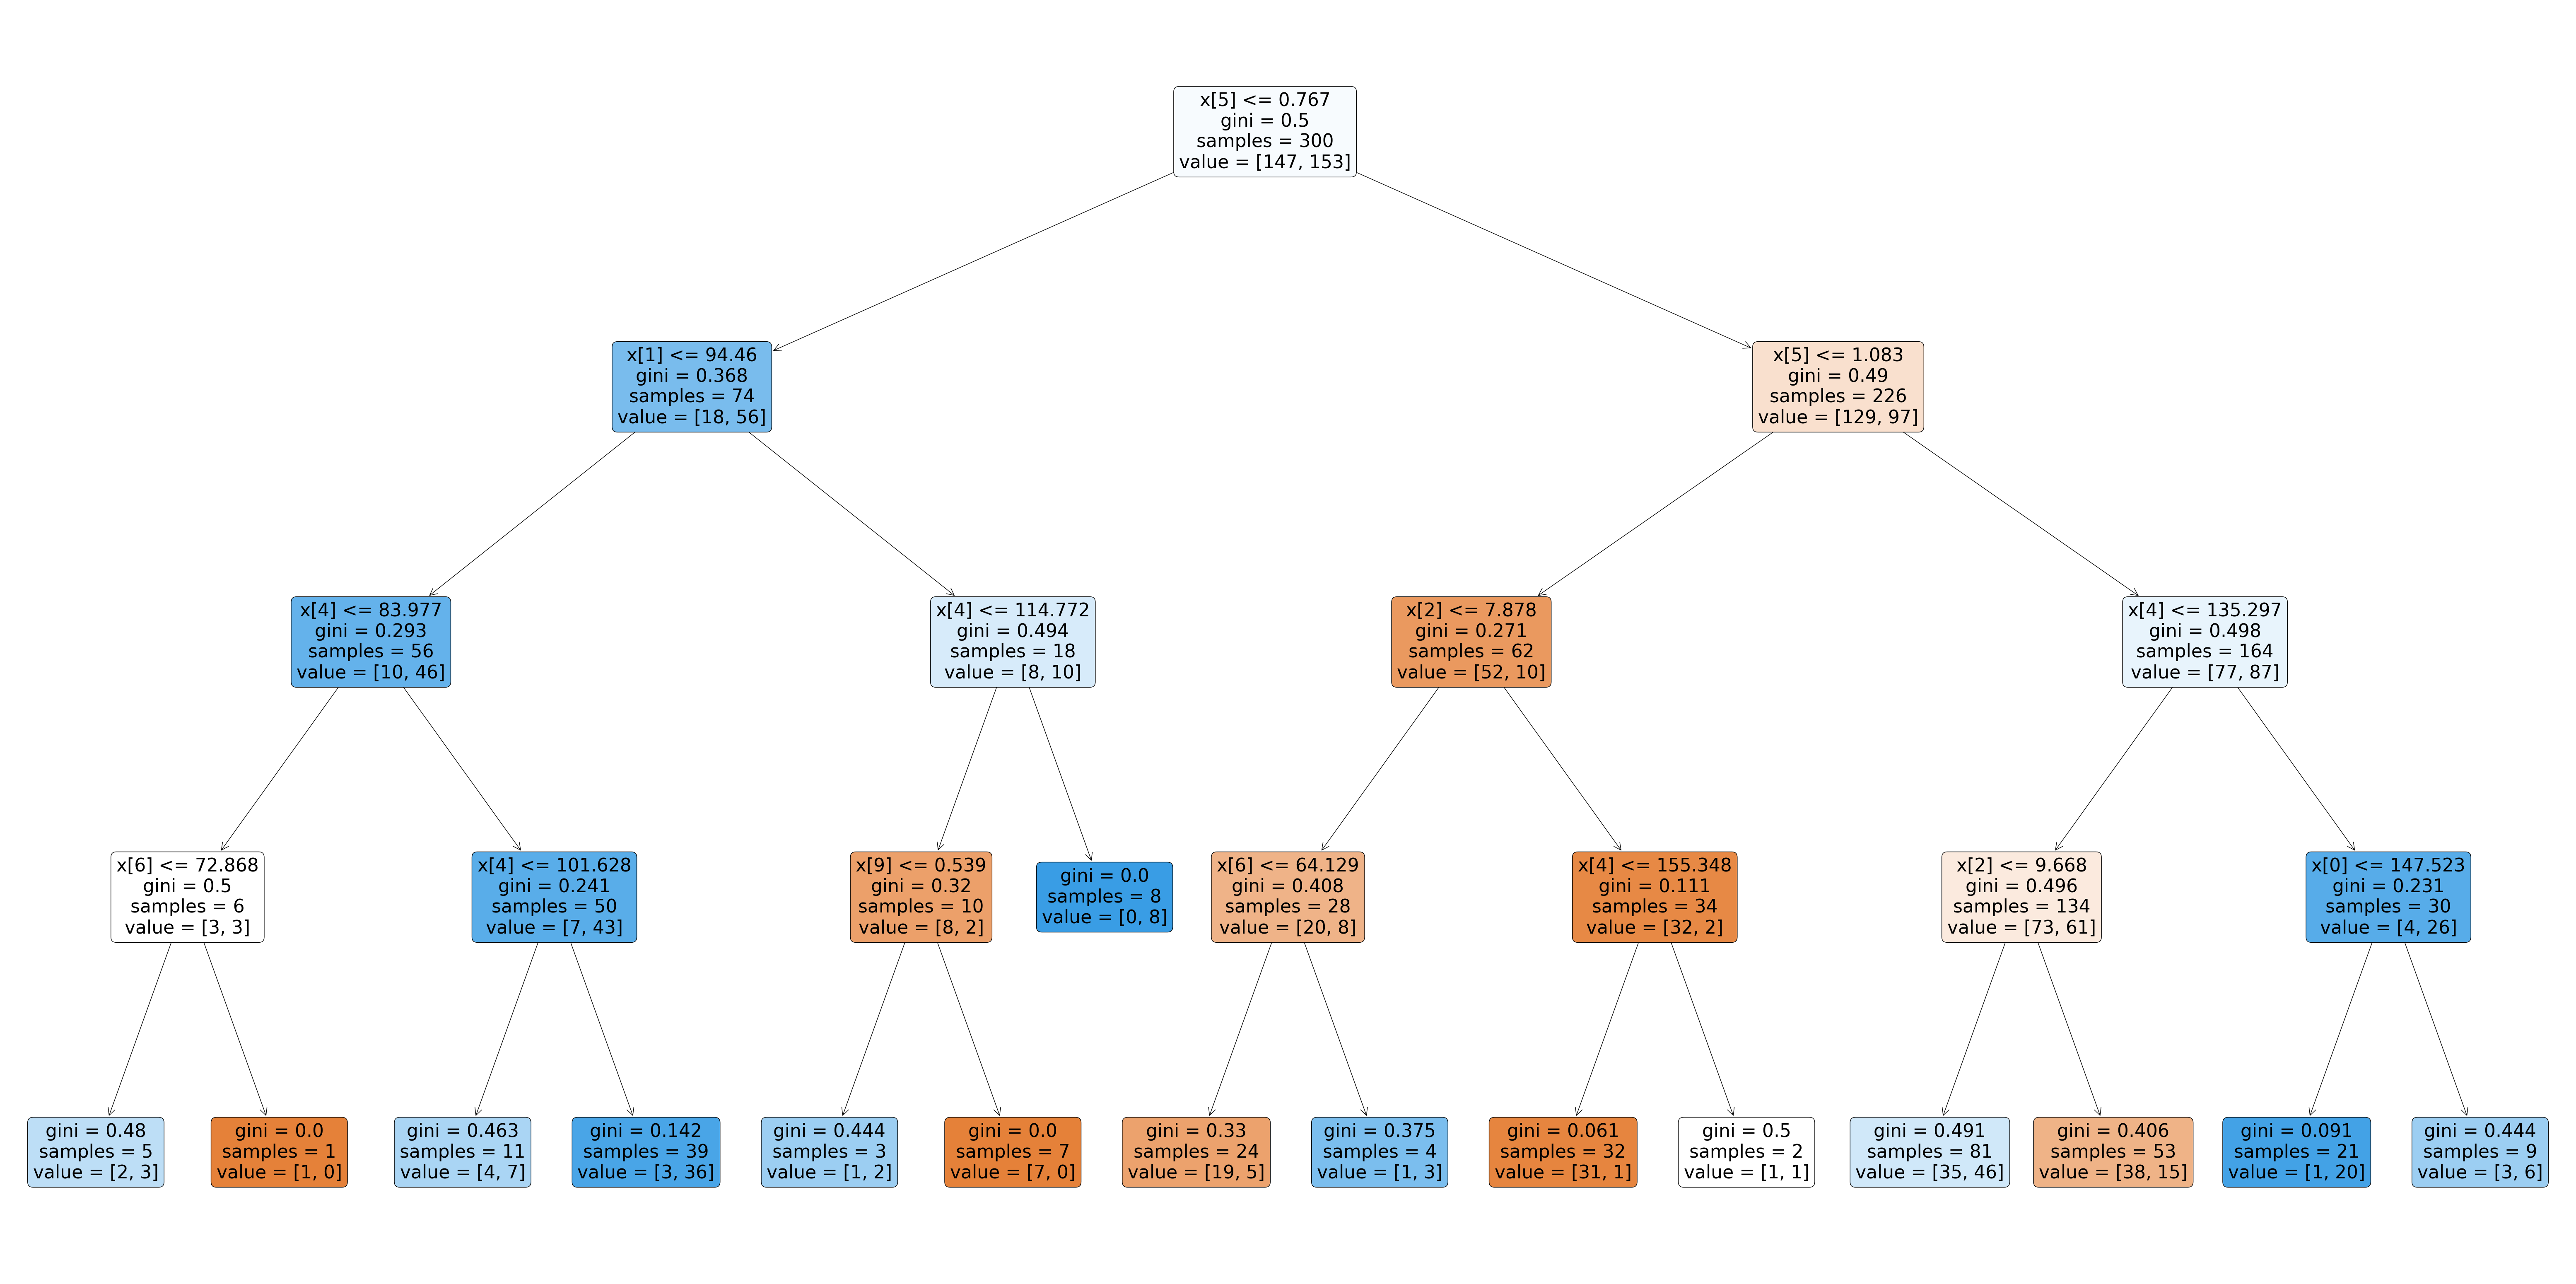

In [25]:
plt.figure(figsize=(80,40))
plot_tree(decc_tree,filled=True,rounded=True,class_names=df.get(target),feature_names=df.get(features))

In [26]:
params={'criterion' : ["gini", "entropy", "log_loss"],'splitter' : ["best", "random"],'max_depth':[1,2,3,4,5,6,7,8,10,20,30,100,200,]}

In [27]:
grid_search=GridSearchCV(decc_tree,params)

In [28]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=4, splitter='random'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 30, 100,
                                       200],
                         'splitter': ['best', 'random']})

In [29]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'splitter': 'random'}

# 

### Use decision trees to prepare a model on fraud data 
### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [30]:
df=pd.read_csv('Fraud_check.csv')

In [31]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [32]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [33]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,good,50047,10,YES
1,YES,Divorced,good,134075,18,YES
2,NO,Married,good,160205,30,YES
3,YES,Single,good,193264,15,YES
4,NO,Married,good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,good,39492,7,YES
596,YES,Divorced,good,55369,2,YES
597,NO,Divorced,good,154058,0,YES
598,YES,Married,good,180083,17,NO


In [34]:
features=df.drop(['Taxable.Income'],axis=1)

In [35]:
target=df[['Taxable.Income']]
target

,Taxable.Income
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [36]:
target=pd.get_dummies(target)
target

,Taxable.Income_risky,Taxable.Income_good
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
595,0,1
596,0,1
597,0,1
598,0,1


In [37]:
features=pd.get_dummies(features)
features

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [38]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=80)

In [39]:
dec_tr=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=5)

In [40]:
dec_tr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [41]:
y_pred=dec_tr.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred)

0.7333333333333333

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.08      0.13        37
           1       0.76      0.95      0.84       113

   micro avg       0.73      0.73      0.73       150
   macro avg       0.55      0.51      0.49       150
weighted avg       0.65      0.73      0.67       150
 samples avg       0.73      0.73      0.73       150



[Text(0.535, 0.9166666666666666, 'x[0] <= 140941.5\ngini = 0.312\nsamples = 450\nvalue = [[363, 87]\n[87, 363]]'),
 Text(0.265, 0.75, 'x[0] <= 126754.5\ngini = 0.339\nsamples = 315\nvalue = [[247, 68]\n[68, 247]]'),
 Text(0.13, 0.5833333333333334, 'x[0] <= 116388.5\ngini = 0.309\nsamples = 277\nvalue = [[224, 53]\n[53, 224]]'),
 Text(0.08, 0.4166666666666667, 'x[0] <= 108004.5\ngini = 0.33\nsamples = 249\nvalue = [[197, 52]\n[52, 197]]'),
 Text(0.04, 0.25, 'x[5] <= 0.5\ngini = 0.299\nsamples = 224\nvalue = [[183, 41]\n[41, 183]]'),
 Text(0.02, 0.08333333333333333, 'gini = 0.257\nsamples = 152\nvalue = [[129, 23]\n[23, 129]]'),
 Text(0.06, 0.08333333333333333, 'gini = 0.375\nsamples = 72\nvalue = [[54, 18]\n[18, 54]]'),
 Text(0.12, 0.25, 'x[6] <= 0.5\ngini = 0.493\nsamples = 25\nvalue = [[14, 11]\n[11, 14]]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.415\nsamples = 17\nvalue = [[12, 5]\n[5, 12]]'),
 Text(0.14, 0.08333333333333333, 'gini = 0.375\nsamples = 8\nvalue = [[2, 6]\n[6, 2]]'),

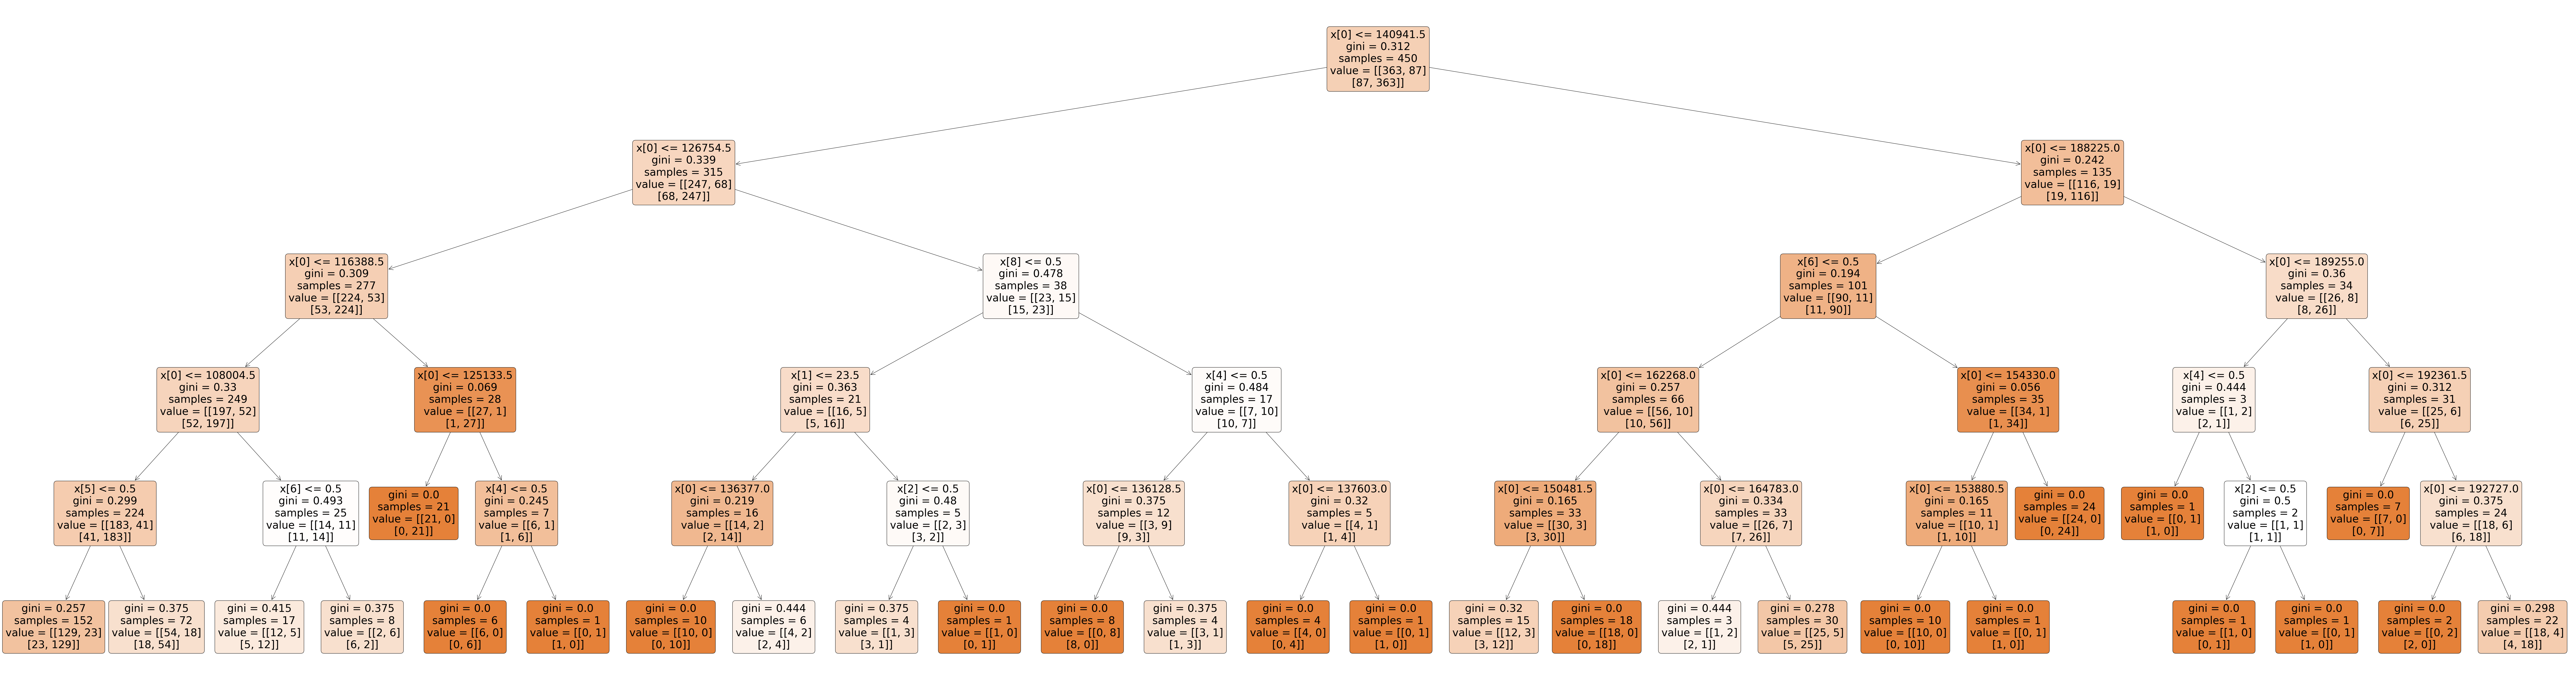

In [48]:
plt.figure(figsize=(150,40))
plot_tree(dec_tr,filled=True,rounded=True,class_names=df.get(target),feature_names=df.get(features))